In [1]:
import os
import pandas as pd
import numpy as np
import librosa
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
audio_dataset_path = '/home/trupti/Desktop/Zense_Proj_ML/archive/Data/genres_original'
metadata = pd.read_csv(r'/home/trupti/Desktop/Zense_Proj_ML/archive/Data/features_30_sec.csv')

In [3]:
def feature_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type = 'kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y = audio, sr = sample_rate, n_mfcc = 40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis = 0)
    return mfccs_scaled_features

In [4]:
extracted_features = []
for index_num, row in tqdm(metadata.iterrows()):
    try:
        final_class_labels = row["label"]
        file_name = os.path.join(os.path.abspath(audio_dataset_path), final_class_labels + '/', str(row["filename"]))
        data = feature_extractor(file_name)
        extracted_features.append([data, final_class_labels])
    except Exception as e:
        print(f"Error: {e}")
        continue

553it [00:18, 31.63it/s]/tmp/ipykernel_22190/1946415227.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_name, res_type = 'kaiser_fast')
/home/trupti/Desktop/anaconda3/lib/python3.11/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
561it [00:18, 29.58it/s]

Error: 


1000it [00:31, 31.27it/s]


In [5]:
extracted_features_df = pd.DataFrame(extracted_features, columns = ['feature', 'class'])

In [6]:
extracted_features_df['class'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
metal        100
pop          100
reggae       100
rock         100
jazz          99
Name: class, dtype: int64

In [7]:
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the split datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (799, 40)
Shape of X_test: (200, 40)
Shape of y_train: (799,)
Shape of y_test: (200,)


In [9]:
classifier = DecisionTreeClassifier(criterion = 'gini')
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
classifier.predict(X_test)

array(['reggae', 'pop', 'disco', 'disco', 'jazz', 'reggae', 'reggae',
       'jazz', 'reggae', 'metal', 'jazz', 'metal', 'hiphop', 'pop', 'pop',
       'rock', 'reggae', 'hiphop', 'metal', 'country', 'country', 'disco',
       'reggae', 'disco', 'hiphop', 'blues', 'classical', 'reggae',
       'reggae', 'disco', 'jazz', 'disco', 'blues', 'jazz', 'metal',
       'disco', 'classical', 'classical', 'metal', 'reggae', 'pop',
       'country', 'disco', 'hiphop', 'reggae', 'country', 'metal', 'pop',
       'disco', 'reggae', 'metal', 'jazz', 'rock', 'hiphop', 'blues',
       'reggae', 'rock', 'jazz', 'reggae', 'pop', 'hiphop', 'metal',
       'reggae', 'classical', 'pop', 'hiphop', 'jazz', 'blues', 'jazz',
       'jazz', 'jazz', 'classical', 'metal', 'classical', 'rock',
       'country', 'blues', 'pop', 'jazz', 'blues', 'blues', 'reggae',
       'rock', 'reggae', 'metal', 'disco', 'metal', 'hiphop', 'disco',
       'hiphop', 'hiphop', 'rock', 'disco', 'jazz', 'pop', 'blues',
       'country

In [11]:
y_test_pred = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [12]:
print("Accuracy for testing dataset: ", test_accuracy)

Accuracy for testing dataset:  0.495


In [13]:
y_train_pred = classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

In [14]:
print("Accuracy for training dataset: ", train_accuracy)

Accuracy for training dataset:  1.0


[Text(0.39011211543120156, 0.975, 'x[0] <= -258.467\ngini = 0.9\nsamples = 799\nvalue = [79, 88, 76, 78, 85, 72, 82, 81, 78, 80]'),
 Text(0.03827519379844961, 0.925, 'x[5] <= 6.192\ngini = 0.576\nsamples = 106\nvalue = [10, 66, 6, 1, 1, 16, 0, 1, 4, 1]'),
 Text(0.015503875968992248, 0.875, 'x[1] <= 111.747\ngini = 0.191\nsamples = 59\nvalue = [0, 53, 1, 1, 1, 1, 0, 1, 1, 0]'),
 Text(0.007751937984496124, 0.825, 'x[8] <= -17.017\ngini = 0.833\nsamples = 6\nvalue = [0, 1, 1, 0, 1, 1, 0, 1, 1, 0]'),
 Text(0.003875968992248062, 0.775, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]'),
 Text(0.011627906976744186, 0.775, 'x[21] <= -4.684\ngini = 0.8\nsamples = 5\nvalue = [0, 1, 1, 0, 1, 1, 0, 1, 0, 0]'),
 Text(0.007751937984496124, 0.725, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.015503875968992248, 0.725, 'x[3] <= 22.372\ngini = 0.75\nsamples = 4\nvalue = [0, 1, 0, 0, 1, 1, 0, 1, 0, 0]'),
 Text(0.011627906976744186, 0.675, 'gini = 0.0\nsamp

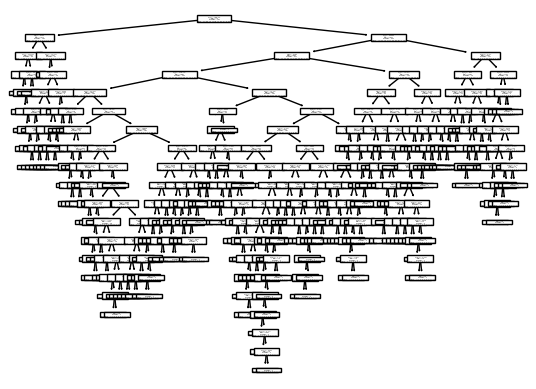

In [15]:
tree.plot_tree(classifier)